In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from pylab import rcParams
from datetime import datetime, timedelta
rcParams['figure.figsize']= 20, 5
import warnings
warnings.filterwarnings('ignore','No frequency information was')

In [2]:
df=pd.read_csv('D:\\Data_sets\\time_series\\ice_cream.csv')
df

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636
...,...,...
572,2019-09-01,100.1741
573,2019-10-01,90.1684
574,2019-11-01,79.7223
575,2019-12-01,75.7094


In [3]:
df.rename(columns={'DATE': 'date', 'IPN31152N': 'units'}, inplace=True)

In [4]:
#convert date column to datetime type
df['date'] = pd.to_datetime(df.date)

In [5]:
#set date as index
df.set_index('date', inplace=True)

In [6]:
df

,units
date,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-09-01,100.1741
2019-10-01,90.1684
2019-11-01,79.7223


In [7]:
ts = df['units']
ts.head(10)

date
1972-01-01     59.9622
1972-02-01     67.0605
1972-03-01     74.2350
1972-04-01     78.1120
1972-05-01     84.7636
1972-06-01    100.5960
1972-07-01    100.1263
1972-08-01     96.3607
1972-09-01     85.8007
1972-10-01     70.3934
Name: units, dtype: float64

In [8]:
# get data from 2010 onwards

In [9]:
start_date=pd.to_datetime('2010-01-01')

In [10]:
ts=ts[start_date:]

In [11]:
ts

date
2010-01-01     91.2895
2010-02-01    110.4994
2010-03-01    127.0971
2010-04-01    132.6468
2010-05-01    134.5576
                ...   
2019-09-01    100.1741
2019-10-01     90.1684
2019-11-01     79.7223
2019-12-01     75.7094
2020-01-01     83.6290
Name: units, Length: 121, dtype: float64

Text(0, 0.5, 'Production')

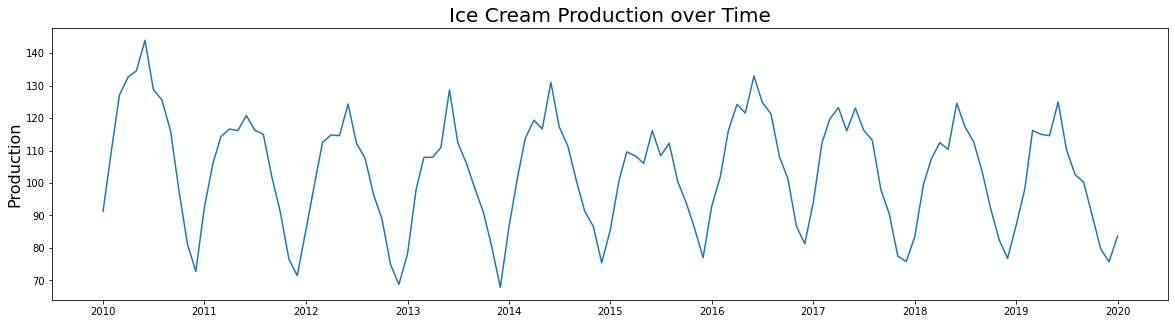

In [12]:
plt.plot(ts)
plt.title('Ice Cream Production over Time', fontsize=20)
plt.ylabel('Production', fontsize=16)

## PACF

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

C:\ProgramData\Anaconda3\envs\time_series\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


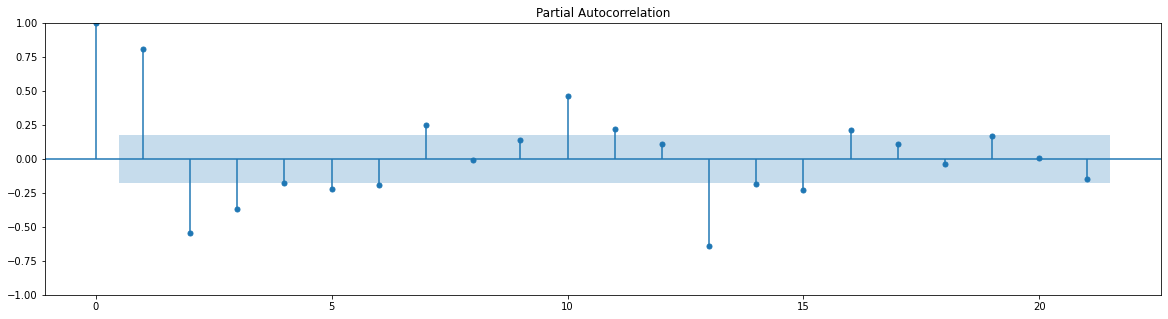

In [14]:
plot_pacf(ts)
plt.show()

In [15]:
## Based on PACF, we should start with an Auto Regressive model with lags 1, 2, 3, 10, 13

### Get training and testing data

In [17]:
train_end= datetime(2016,12,1)

In [18]:
test_end= datetime(2019,12,1)

In [19]:
train_data = ts[:train_end]
test_data = ts[train_end + timedelta(days=1):test_end]

In [21]:
# test_data

## fitting AR model

In [22]:
from statsmodels.tsa.arima.model import ARIMA

In [23]:
# define model
model = ARIMA(train_data, order=(3,0,0))

C:\ProgramData\Anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [24]:
model_fit = model.fit()

In [25]:
#summary of the model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  units   No. Observations:                   84
Model:                 ARIMA(3, 0, 0)   Log Likelihood                -294.008
Date:                Tue, 30 Nov 2021   AIC                            598.015
Time:                        15:26:31   BIC                            610.169
Sample:                    01-01-2010   HQIC                           602.901
                         - 12-01-2016                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        103.5071      2.531     40.893      0.000      98.546     108.468
ar.L1          1.0488      0.116      9.046      0.000       0.822       1.276
ar.L2         -0.0532      0.204     -0.260      0.7

In [26]:
## use lag1, and lag3

In [27]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [28]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data - predictions

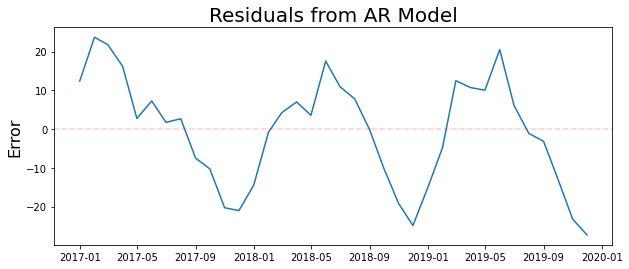

In [35]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'units')

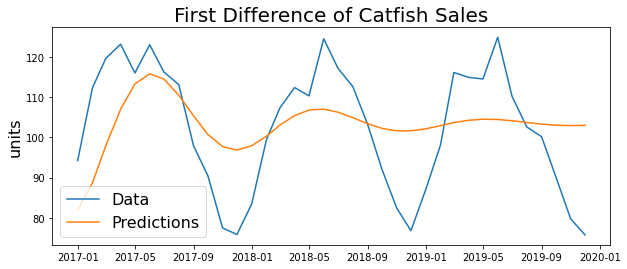

In [47]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('units', fontsize=16)

In [31]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 13.890102332088274


In [34]:
## we can see as the time inc. our prediction is closer to mean , which is not good

## Applying rolling forecast

In [36]:
# predict 1 month and use it for next month

In [41]:
pred_rolling=pd.Series()

for end_date in test_data.index:
    train_data=ts[:end_date - timedelta(days=1)]
    model= ARIMA(train_data, order=(3,0,0))
    model_fit=model.fit()
    pred=model_fit.predict(end_date)
    pred_rolling.loc[end_date]=pred.loc[end_date]

C:\Users\BHAIYA~1\AppData\Local\Temp/ipykernel_39276/2893860573.py:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pred_rolling=pd.Series()
C:\ProgramData\Anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda

C:\ProgramData\Anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\envs\time_series\lib\si

C:\ProgramData\Anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\envs\time_series\lib\site-packages\statsmodels\tsa\base\tsa_model.py:536: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\envs\time_series\lib\si

In [42]:
residuals_rolling= test_data - pred_rolling

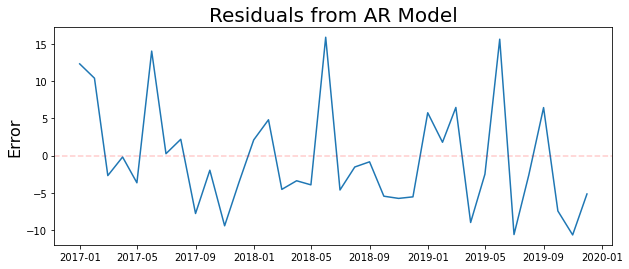

In [43]:
plt.figure(figsize=(10,4))
plt.plot(residuals_rolling)
plt.title('Residuals from AR Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'units')

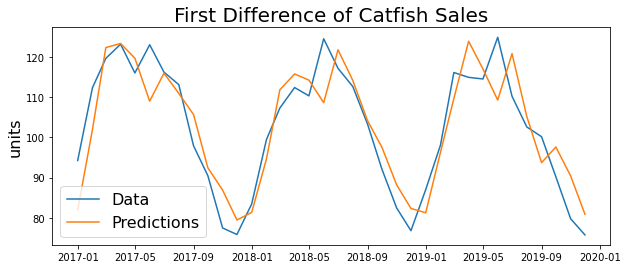

In [46]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(pred_rolling)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Catfish Sales', fontsize=20)
plt.ylabel('units', fontsize=16)

In [45]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals_rolling**2)))

Root Mean Squared Error: 7.19651363862685
